In [127]:
#import libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

In [128]:
#retrieve data
df=pd.read_csv("/kaggle/input/nsei-prev-data/in_nsei_daily.csv",index_col='minute', parse_dates=True).close
df.index = df.index.to_pydatetime()
df.head()

2017-01-02 09:15:00+05:30    8178.70
2017-01-03 09:15:00+05:30    8188.60
2017-01-04 09:15:00+05:30    8196.55
2017-01-05 09:15:00+05:30    8269.90
2017-01-06 09:15:00+05:30    8247.85
Name: close, dtype: float64

In [129]:
df = pd.DataFrame(df)
df

,close
2017-01-02 09:15:00+05:30,8178.70
2017-01-03 09:15:00+05:30,8188.60
2017-01-04 09:15:00+05:30,8196.55
2017-01-05 09:15:00+05:30,8269.90
2017-01-06 09:15:00+05:30,8247.85
...,...
2022-12-26 09:15:00+05:30,18010.30
2022-12-27 09:15:00+05:30,18136.00
2022-12-28 09:15:00+05:30,18109.25
2022-12-29 09:15:00+05:30,18207.10


In [130]:
#feature extraction
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

In [131]:
#store features
features=['month', 'year', 'day_of_year']
target='close'

In [132]:
#train and test splits
xtrain, xtest, ytrain, ytest=train_test_split(df[features], df[target], test_size=0.15)

In [133]:
#define model
gbr = GradientBoostingRegressor()
print(gbr)

GradientBoostingRegressor()


In [134]:
#fit the model
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor()

In [135]:
#get score
score = gbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9858905297392786


In [136]:
#apply cross validation
scores = cross_val_score(gbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.98


In [137]:
#apply k-folds
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.98


In [138]:
#calculate accuracy
ypred = gbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 124846.98
RMSE: 353.34


In [139]:
ytest.index

DatetimeIndex(['2017-01-30 09:15:00+05:30', '2020-12-15 09:15:00+05:30',
               '2022-04-22 09:15:00+05:30', '2020-07-27 09:15:00+05:30',
               '2021-07-29 09:15:00+05:30', '2022-08-02 09:15:00+05:30',
               '2020-10-23 09:15:00+05:30', '2019-11-14 09:15:00+05:30',
               '2019-05-13 09:15:00+05:30', '2020-06-19 09:15:00+05:30',
               ...
               '2020-10-27 09:15:00+05:30', '2017-12-26 09:15:00+05:30',
               '2017-10-27 09:15:00+05:30', '2020-02-03 09:15:00+05:30',
               '2017-01-23 09:15:00+05:30', '2020-06-08 09:15:00+05:30',
               '2018-11-30 09:15:00+05:30', '2020-07-01 09:15:00+05:30',
               '2019-01-14 09:15:00+05:30', '2019-02-04 09:15:00+05:30'],
              dtype='datetime64[ns, pytz.FixedOffset(330)]', length=222, freq=None)

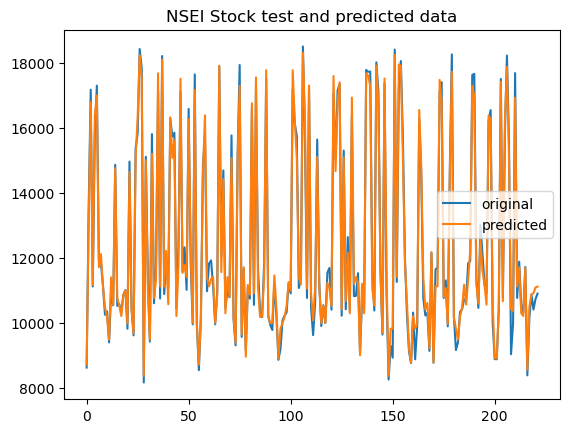

In [140]:
#plot data, better results
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("NSEI Stock test and predicted data")
plt.legend()
plt.show()

In [141]:
#predict value against test
predicted=gbr.predict(df[features])
print(predicted)

[ 8386.53549544  8386.53549544  8386.53549544 ... 18090.5443832
 18156.48527462 18156.48527462]


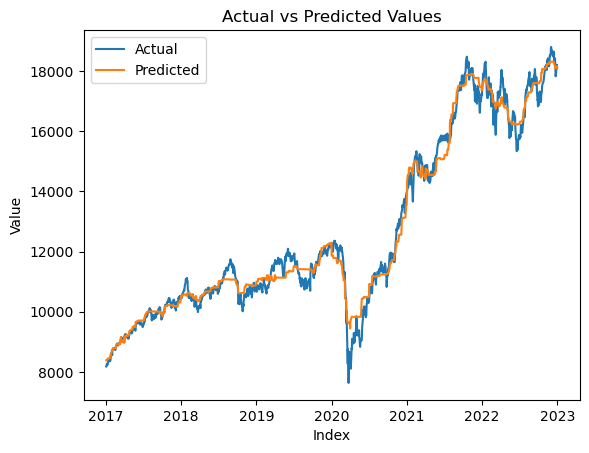

In [142]:
# Plot the actual vs predicted values
plt.plot(df.index,df[target], label='Actual')
plt.plot(df.index,predicted, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [143]:
#retrieve data
df=pd.read_csv("/kaggle/input/nsei-prev-data/in_nsei_daily.csv",index_col='minute', parse_dates=True)
df.index = df.index.to_pydatetime()
df.head()

,ticker,instrument_token,open,high,low,close
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85


In [144]:
#store new features
features=['open', 'high', 'low']
target='close'

In [145]:
#train and test splits
xtrain, xtest, ytrain, ytest=train_test_split(df[features], df[target], test_size=0.15)

In [146]:
#define model
gbr = GradientBoostingRegressor()
print(gbr)

GradientBoostingRegressor()


In [147]:
#fit the model
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor()

In [148]:
#get score
score = gbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9998053387927291


In [149]:
#apply cross validation
scores = cross_val_score(gbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [150]:
#apply k-folds
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [151]:
#calculate accuracy
#predict value against features
predicted=gbr.predict(df[features])
print(predicted)
mse = mean_squared_error(df['close'], predicted)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

[ 8187.63097178  8187.63097178  8253.04171023 ... 18107.17714412
 18161.40319524 18152.11792001]
MSE: 2308.00
RMSE: 48.04


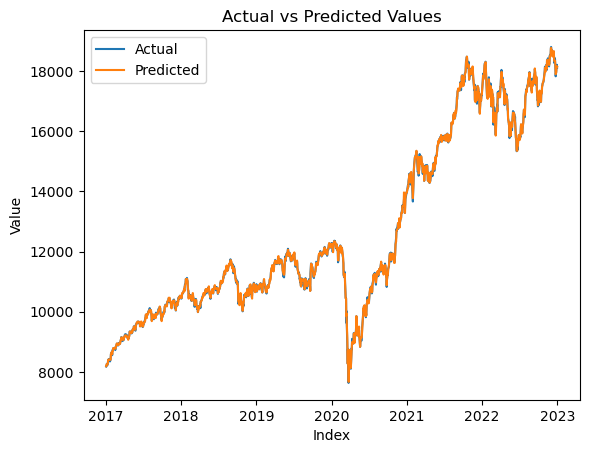

In [152]:
# Plot the actual vs predicted values
plt.plot(df.index,df[target], label='Actual')
plt.plot(df.index,predicted, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()